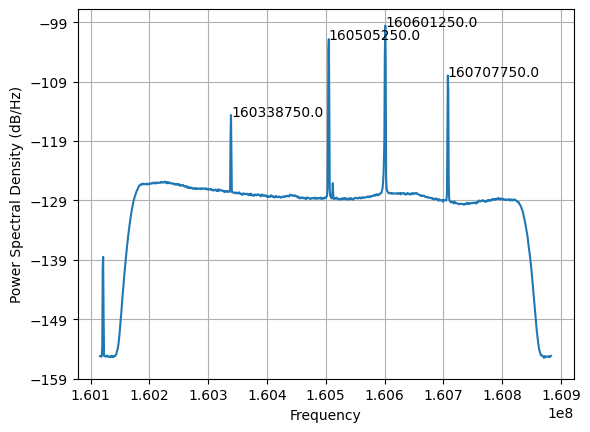

In [10]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

#samples = wavfile.read('../data/test_airspyhf.raw')
samples = np.fromfile('../data/test_airspyhf.fc32', dtype=np.complex64)
sample_rate = 768000
center_freq = 160500000
size = len(samples)
x = samples

fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=768000, Fc=160500000)
peaks = signal.find_peaks(psd[0], prominence=0.000000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show()


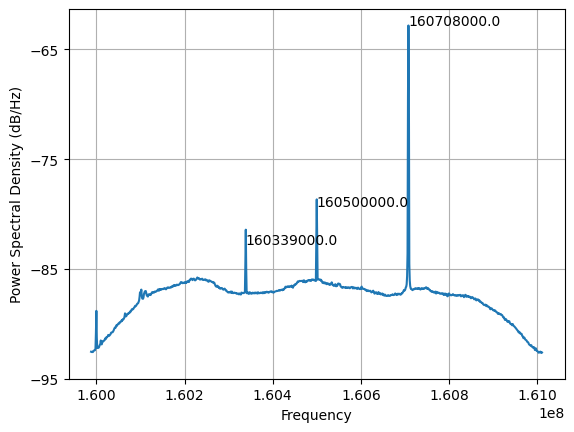

In [31]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

samples = np.fromfile('../data/test_multiple_4.s8', np.uint8)
#samples = np.fromfile('../data/test_airspyhf.fc32', dtype=np.complex64)
sample_rate = 1024000
center_freq = 160500000
size = len(samples)
x = samples

x = x.astype(np.float32)
x = (x - 127) / 128
x = x[::2] + x[1::2]*1j

# PLOT THE PSD
fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=1024000, Fc=160500000)
peaks = signal.find_peaks(psd[0], prominence=0.000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show()





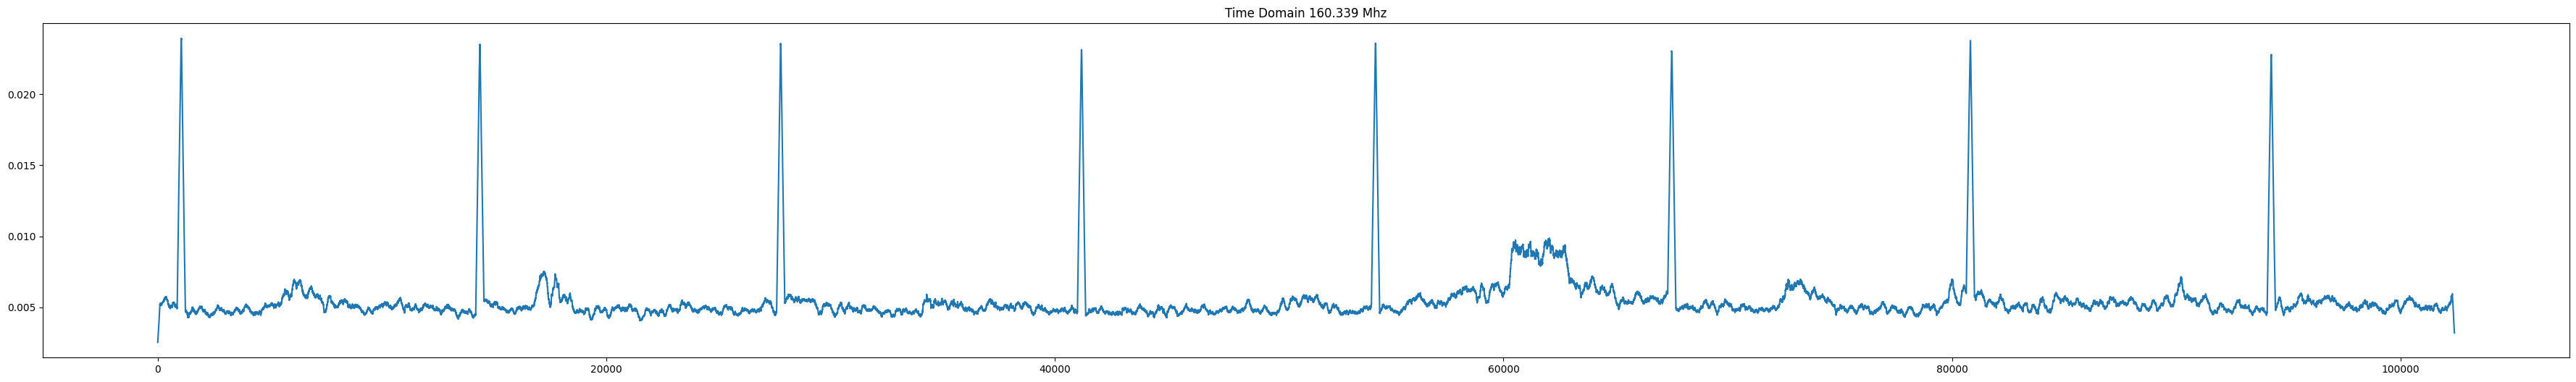

In [29]:
# FILTER AND PLOT TIME DOMAIN

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*161000)

x = x * p
x = signal.convolve(x, h, 'same')
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.title("Time Domain 160.339 Mhz")
plt.show()


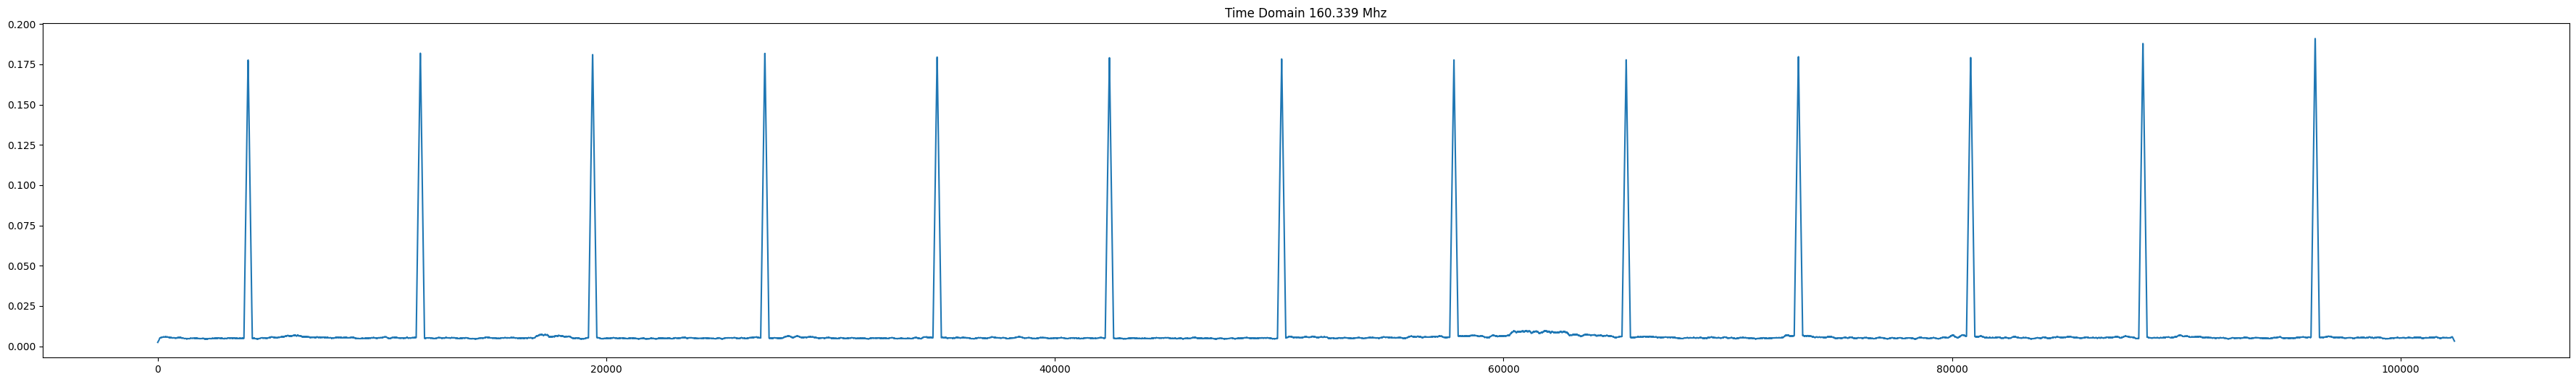

In [32]:
# FILTER AND PLOT TIME DOMAIN

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-208000)

x = x * p
x = signal.convolve(x, h, 'same')
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.title("Time Domain 160.339 Mhz")
plt.show()